### 

### 爬取一页

In [4]:
import requests
from lxml import etree

In [2]:
url = 'https://sh.fang.lianjia.com/loupan'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36'}

'<!DOCTYPE html><html lang="zh-CN"><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta name="renderer" content="webkit" /><meta http-equiv="Cache-Control" content="no-transform" /><meta http-equiv="Cache-Control" content="no-siteapp" /><meta name="format-detection" content="telephone=no" />\n    <title>上海楼盘|新开盘楼盘|房价信息_上海楼盘(上海链家新房)</title>\n    <meta name="description" content="上海链家新房频道,为你提供大量真实优质的上海新开盘楼盘、新房房价等信息快速查询,创造最佳新房购房体验." />\n    <meta name="keywords" content="上海楼盘,上海房价" />\n<link href="/favicon.ico" type="image/x-icon" rel=icon><link href="/favicon.ico" type="image/x-icon" rel="shortcut icon"><link rel="stylesheet" href="//s1.ljcdn.com/phoenix/static/dist/common/site.css?_v=20220315113050"><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.lianjia.com/sh/loupan/" >\n    <link rel="stylesheet" href="//s1.ljcdn.com/phoenix/static/dist/pages/list/index.css?_v=20220315113
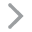

In [3]:
response = requests.get(url, headers = header)
print(response.status_code)
txt = response.text
txt

In [14]:
dom = etree.HTML(txt)  
loupan = dom.xpath('//div[@class="resblock-name"]/a/text()') #得到的数据类型是列表
location = dom.xpath('//div[@class="resblock-location"]/span[1]/text()')
area_mid = dom.xpath('//div[@class="resblock-area"]/span')#爬到节点位为止
price = dom.xpath('//div[@class="main-price"]/span[@class="number"]/text()')

In [15]:
area = [i.text for i in area_mid] #由于有些楼盘没有面积，所以爬取节点时需要返回空值

In [16]:
print(loupan)
print(location)
print(area)
print(price)

['象屿和悦新宸', '世纪金源梧桐印象', '悦湖里', '杭州湾融创文旅城', '华发招商依云四季', '绿城乌镇雅园', '中建玖海云天', '御府景苑', '奥园印象高迪', '中海阅麓山']
['上海周边', '金山', '上海周边', '上海周边', '金山', '上海周边', '浦东', '上海周边', '上海周边', '松江']
['建面 76-119㎡', '建面 78-100㎡', '建面 70-95㎡', '建面 70-145㎡', '建面 78-125㎡', '建面 77-147㎡', '建面 93-143㎡', '建面 87-128㎡', None, '建面 90-143㎡']
['16500', '21883', '15000', '13500', '21000', '24000', '34000', '8000', '10650', '53000']


In [17]:
#打印长度，可以判断是否有些节点没有值
print(len(loupan))
print(len(location))
print(len(area))
print(len(price))

10
10
10
10


在网页源代码中分析得到，图片的链接是放在data-original属性中

In [18]:
pic = dom.xpath('//img[@class="lj-lazy"]/@data-original')
pic

['https://image1.ljcdn.com/newhouse-user-image/8ce1195bc5a8555043bd60886f601f8d.png.592x432.jpg',
 'https://image1.ljcdn.com/newhouse-user-image/167015d633ec33cabadc89a95a12665b.jpg.592x432.jpg',
 'https://image1.ljcdn.com/newhouse-user-image/356d37b73ec5b13ead4679b2e3ba9cc2.jpg.592x432.jpg',
 'https://image1.ljcdn.com/hdic-resblock/prod-b662a86a-6689-4cb6-aaee-4f7c2f77e37ephpGhuy11.592x432.jpg',
 'https://image1.ljcdn.com/newhouse-user-image/48ed513c197e8ca6911d6f6b1a8b456a.png.592x432.jpg',
 'https://image1.ljcdn.com/newhouse-user-image/1796302de77517dfefccbc7e68625c39.png.592x432.jpg',
 'https://image1.ljcdn.com/newhouse-user-image/b0154362cd52250005fb406699752958.jpg.592x432.jpg',
 'https://image1.ljcdn.com/hdic-resblock/13800b24-2a84-4a92-9a08-31a1ede31d6a.jpg.592x432.jpg',
 'https://image1.ljcdn.com/hdic-resblock/bc25bab7-2fcd-4bc4-a432-79c33f6c5650.jpg.592x432.jpg',
 'https://image1.ljcdn.com/hdic-resblock/d65b90ae-3935-4133-ba77-3932ae876b9e.jpg.592x432.jpg']

根据上面得到的链接，爬取链接中的图片

In [34]:
import time
import random
x = 0 
for i in pic:    
    img_res = requests.get(i)
    img_save = f'd:/2/{x}.jpg'
    f = open(img_save, 'wb')
    f.write(img_res.content) #图片存储的时候，要用字节流形式content属性    
    x += 1
    time.sleep(random.randint(3, 10))
f.close()

### 爬取多页

In [23]:
import time
import random
lp = []
lc = []
ar = []
pr = []
for i in range(1, 4):
    print('正在爬取第{0}页'.format(i))
    url = 'https://sh.fang.lianjia.com/loupan/pg{0}/'.format(i)
    response = requests.get(url, headers = header)
    txt = response.text
    dom = etree.HTML(txt)  
    loupan = dom.xpath('//div[@class="resblock-name"]/a/text()')
    location = dom.xpath('//div[@class="resblock-location"]/span[1]/text()')
    area_mid = dom.xpath('//div[@class="resblock-area"]/span')
    price = dom.xpath('//div[@class="main-price"]/span[@class="number"]/text()')
    area = [i.text for i in area_mid]
    lp.extend(loupan)  #将每一次爬取结果放到列表中
    lc.extend(location)
    ar.extend(area)
    pr.extend(price)
    time.sleep(random.randint(3, 10))

In [24]:
print(lp)
print(lc)
print(ar)
print(pr)

['象屿和悦新宸', '世纪金源梧桐印象', '悦湖里', '杭州湾融创文旅城', '华发招商依云四季', '绿城乌镇雅园', '中建玖海云天', '御府景苑', '奥园印象高迪', '中海阅麓山', '中海阅麓山', '香逸铂悦', '颐和湾花园', '虹桥1号', '招商花园城', '嘉润万象城', '国乐广场', '东方之门', '云间新天地', '合生伴海', '新湖明珠城', '前滩新天地', '太仓港商贸中心', '虹桥时代广场', '葛洲坝玉兰花园', '佳兆业城市广场', '上海长滩', '长城逸府', '莲花休闲广场', '莘松绿嘉园']
['上海周边', '金山', '上海周边', '上海周边', '金山', '上海周边', '浦东', '上海周边', '上海周边', '松江', '松江', '上海周边', '上海周边', '闵行', '宝山', '上海周边', '松江', '上海周边', '松江', '上海周边', '普陀', '浦东', '上海周边', '青浦', '青浦', '嘉定', '宝山', '金山', '上海周边', '松江']
['建面 76-119㎡', '建面 78-100㎡', '建面 70-95㎡', '建面 70-145㎡', '建面 78-125㎡', '建面 77-147㎡', '建面 93-143㎡', '建面 87-128㎡', None, '建面 90-143㎡', '建面 70-125㎡', '建面 84-109㎡', '建面 143-192㎡', None, None, None, None, '建面 208-520㎡', None, '建面 89-149㎡', None, None, None, None, None, '建面 82-140㎡', '建面 106-164㎡', '建面 90-177㎡', None, '建面 112-165㎡']
['16500', '21883', '15000', '13500', '21000', '24000', '34000', '8000', '10650', '53000', '37000', '24900', '31000', '45000', '33000', '25000', '42000', '50000', '55000', '9700', '850

In [25]:
print(len(lp))
print(len(lc))
print(len(ar))
print(len(pr))

30
30
30
30


### 将结果放到dataframe中，并存储到excel的csv文件中

In [26]:
import pandas as pd
dic = {
    'loupan': lp,
    'location':lc,
    'area': ar,
    'price': pr
}
df = pd.DataFrame(dic)
df

,loupan,location,area,price
0,象屿和悦新宸,上海周边,建面 76-119㎡,16500
1,世纪金源梧桐印象,金山,建面 78-100㎡,21883
2,悦湖里,上海周边,建面 70-95㎡,15000
3,杭州湾融创文旅城,上海周边,建面 70-145㎡,13500
4,华发招商依云四季,金山,建面 78-125㎡,21000
5,绿城乌镇雅园,上海周边,建面 77-147㎡,24000
6,中建玖海云天,浦东,建面 93-143㎡,34000
7,御府景苑,上海周边,建面 87-128㎡,8000
8,奥园印象高迪,上海周边,None,10650
9,中海阅麓山,松江,建面 90-143㎡,53000


In [27]:
df.to_csv('data_frame.csv', index=None, encoding='utf-8-sig')

### 数据清洗

In [98]:
import pandas as pd
data = pd.read_csv('data_frame.csv')
data

,Loupan,Location,Price,Area
0,招商碧桂园十里海湾,上海周边,8500,建面 57-106㎡
1,上城院子,宝山,54390,建面 101-135㎡
2,中建·玖里书香,浦东,28690,建面 60-99㎡
3,保利云上拾光,浦东,45000,建面 75-99㎡
4,中海阅麓山,松江,53000,建面 90-143㎡
...,...,...,...,...
215,新湖明珠城,普陀,105000,建面 93-195㎡
216,新未来樾湖,金山,19500,建面 56-110㎡
217,广弘新天地,上海周边,25000,NaN
218,东原逸墅,浦东,55000,NaN


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 219
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Loupan    213 non-null    object
 1   Location  213 non-null    object
 2   Price     213 non-null    object
 3   Area      128 non-null    object
dtypes: object(4)
memory usage: 16.4+ KB


1、去除价格未能正常呈现的数据

In [99]:
#第一种做法
data = data[data['Price'].apply(lambda x: x.isdigit())] #对系列中的每个元素应用.isdigit()函数
#或者
#data=data[data['price'].apply(lambda x: bool(re.findall('^\d+\d$', x)))]
data

,Loupan,Location,Price,Area
0,招商碧桂园十里海湾,上海周边,8500,建面 57-106㎡
1,上城院子,宝山,54390,建面 101-135㎡
2,中建·玖里书香,浦东,28690,建面 60-99㎡
3,保利云上拾光,浦东,45000,建面 75-99㎡
4,中海阅麓山,松江,53000,建面 90-143㎡
...,...,...,...,...
215,新湖明珠城,普陀,105000,建面 93-195㎡
216,新未来樾湖,金山,19500,建面 56-110㎡
217,广弘新天地,上海周边,25000,NaN
218,东原逸墅,浦东,55000,NaN


In [ ]:
#da二种做法
data.drop(data[data['Price'].str.contains('价格待定|-')].index, inplace=True)
data

In [101]:
#从data.info()信息中可以看到，Price是object类型，故数据清洗后需要转换
data['Price'] = data['Price'].astype('float')

2、去除不是上海地区的（即留下上海地区的）

In [102]:
quyu =  ['黄浦', '杨浦', '虹口', '普陀', '静安', '浦东', '闵行', '松江', '宝山', '青浦', '嘉定', '奉贤', '崇明', '金山']
data = data[data['Location'].isin(quyu)]
data

,Loupan,Location,Price,Area
1,上城院子,宝山,54390.0,建面 101-135㎡
2,中建·玖里书香,浦东,28690.0,建面 60-99㎡
3,保利云上拾光,浦东,45000.0,建面 75-99㎡
4,中海阅麓山,松江,53000.0,建面 90-143㎡
5,云湖壹号,金山,21179.0,建面 76-104㎡
...,...,...,...,...
214,东原璞阅,奉贤,40000.0,建面 123-153㎡
215,新湖明珠城,普陀,105000.0,建面 93-195㎡
216,新未来樾湖,金山,19500.0,建面 56-110㎡
218,东原逸墅,浦东,55000.0,NaN


3、求各区房价均值

In [103]:
location_mean = data.groupby(by='Location')['Price'].mean()
#或者location_mean = data.groupby(by='Location').agg({'Price': 'mean'})
location_mean.sort_values(ascending=False, inplace=True)#按房价降序排序
location_mean

Location
虹口    145500.000000
黄浦    140000.000000
静安    139500.000000
普陀    114250.000000
浦东     94451.290323
杨浦     79000.000000
闵行     67555.555556
松江     53402.631579
青浦     47566.666667
宝山     47335.583333
奉贤     37881.250000
嘉定     37392.857143
崇明     30199.900000
金山     23698.357143
Name: Price, dtype: float64

4、求出房价均价最高的是哪个区，且房价是多少

In [107]:
#第一种方法
location_mean[0:1]

Location
虹口    145500.0
Name: Price, dtype: float64

In [108]:
#第二种方法
print(location_mean.max())
print(location_mean.idxmax())

145500.0
虹口


5、求出每个区有多少个楼盘

In [109]:
num = data['Location'].value_counts()
#或者这样统计num = data.groupby(by='Location')['Location'].count()
num

浦东    31
松江    19
闵行    18
嘉定    14
金山    14
宝山    12
奉贤    12
崇明    10
青浦     9
普陀     4
杨浦     3
静安     2
虹口     2
黄浦     1
Name: Location, dtype: int64

6、保存处理后的结果

In [111]:
data.to_csv('aaa.csv', index=None, encoding='utf-8-sig')

### 数据可视化分析

In [112]:
import pandas as pd
data = pd.read_csv('aaa.csv')
data

,Loupan,Location,Price,Area
0,上城院子,宝山,54390.0,建面 101-135㎡
1,中建·玖里书香,浦东,28690.0,建面 60-99㎡
2,保利云上拾光,浦东,45000.0,建面 75-99㎡
3,中海阅麓山,松江,53000.0,建面 90-143㎡
4,云湖壹号,金山,21179.0,建面 76-104㎡
...,...,...,...,...
146,东原璞阅,奉贤,40000.0,建面 123-153㎡
147,新湖明珠城,普陀,105000.0,建面 93-195㎡
148,新未来樾湖,金山,19500.0,建面 56-110㎡
149,东原逸墅,浦东,55000.0,NaN


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Loupan    151 non-null    object 
 1   Location  151 non-null    object 
 2   Price     151 non-null    float64
 3   Area      79 non-null     object 
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


#### 1、各区房价均价情况

In [114]:
location_mean = data.groupby(by='Location')['Price'].mean()
#location_mean = data.groupby(by='Location').agg({'Price': 'mean'})
location_mean.sort_values(ascending=False, inplace=True)
location_mean

Location
虹口    145500.000000
黄浦    140000.000000
静安    139500.000000
普陀    114250.000000
浦东     94451.290323
杨浦     79000.000000
闵行     67555.555556
松江     53402.631579
青浦     47566.666667
宝山     47335.583333
奉贤     37881.250000
嘉定     37392.857143
崇明     30199.900000
金山     23698.357143
Name: Price, dtype: float64

In [23]:
#各区房价均价情况第二种做法
# location_mean_new = data.groupby(by='Location').agg({'Price': 'mean'})
# location_mean_new
# x = location_mean_new.index
# y = location_mean_new['Price']

,Price
Location,
嘉定,37392.857143
奉贤,37881.250000
宝山,47335.583333
崇明,30199.900000
普陀,114250.000000
杨浦,79000.000000
松江,53402.631579
浦东,94451.290323
虹口,145500.000000


In [115]:
# 第一种方法得到的是series结构，根据series获取x、y的值
x = location_mean.index
y = location_mean
print(x)
print(list(x))
print(y)
print(list(y))

Index(['虹口', '黄浦', '静安', '普陀', '浦东', '杨浦', '闵行', '松江', '青浦', '宝山', '奉贤', '嘉定',
       '崇明', '金山'],
      dtype='object', name='Location')
['虹口', '黄浦', '静安', '普陀', '浦东', '杨浦', '闵行', '松江', '青浦', '宝山', '奉贤', '嘉定', '崇明', '金山']
Location
虹口    145500.000000
黄浦    140000.000000
静安    139500.000000
普陀    114250.000000
浦东     94451.290323
杨浦     79000.000000
闵行     67555.555556
松江     53402.631579
青浦     47566.666667
宝山     47335.583333
奉贤     37881.250000
嘉定     37392.857143
崇明     30199.900000
金山     23698.357143
Name: Price, dtype: float64
[145500.0, 140000.0, 139500.0, 114250.0, 94451.29032258065, 79000.0, 67555.55555555556, 53402.63157894737, 47566.666666666664, 47335.583333333336, 37881.25, 37392.857142857145, 30199.9, 23698.35714285714]


#### 2、绘制matplotlib图

In [116]:
import matplotlib.pyplot as plt

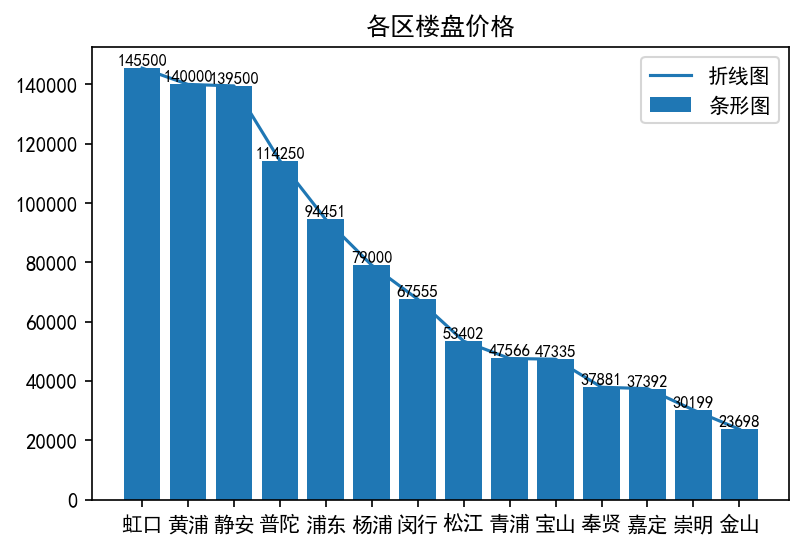

In [117]:
plt.rcParams['font.sans-serif'] = 'SimHei' 
plt.figure(dpi=150)

plt.bar(x, y)
plt.plot(x, y)

plt.title('各区楼盘价格')
for i,j in zip(x, y):
    plt.text(i,j+1000, '%d'%j, ha='center', fontsize=8)
plt.legend(['折线图', '条形图'])
plt.show()

#### 3、绘制pyecharts图

1）绘制条形图和折线图

In [118]:
from pyecharts.charts import Bar,Line
import pyecharts.options as opts

In [119]:
#统计各区楼盘数
num = data['Location'].value_counts()
#或者这样统计num = data.groupby(by='Location')['Location'].count()

#下图中各区楼盘均价和各区楼盘数是共用x轴，所以这里对各区楼盘数的x轴按照各区楼盘均价排序
sortlist = list(x)
num_new = num[sortlist]

num_new

虹口     2
黄浦     1
静安     2
普陀     4
浦东    31
杨浦     3
闵行    18
松江    19
青浦     9
宝山    12
奉贤    12
嘉定    14
崇明    10
金山    14
Name: Location, dtype: int64

In [120]:
bar = (
    Bar()
    .add_xaxis(list(x))
    .add_yaxis('各区均价', list(y)) 
    .extend_axis(yaxis=opts.AxisOpts(name='楼盘数'))
)

line = (
    Line()
    .add_xaxis(list(x))
    .add_yaxis('楼盘数', list(num_new), yaxis_index=1, z=2)    
)

#bar.render_notebook()
#bar.render('aa.html')
bar.overlap(line).render_notebook()

2）Map和Geo分别绘制上海地理图（各区楼盘均价）

In [121]:
from pyecharts.charts import Map
a, b = (y.min(), y.max())
map=(
    Map(init_opts=opts.InitOpts(width='1000px', height='800px'))
    .add('房价均价', [(i+'区',j) for i, j in zip(x, list(y))], '上海',)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="上海各地区楼盘均价",subtitle='2021年12月'),
        visualmap_opts=opts.VisualMapOpts(min_=int(a),max_=int(b))
    )
)
map.render_notebook()

In [122]:
from pyecharts.charts import Geo
from pyecharts.commons.utils import JsCode

a, b = (y.min(), y.max())
geo=(
    Geo(init_opts=opts.InitOpts(width='1000px', height='800px'))
    .add_schema('上海',itemstyle_opts=opts.ItemStyleOpts(color='#323c48', border_color='#ffffff'))
    .add('房价均价', [(i+'区',j) for i, j in zip(x, list(y.round(1)))],
        label_opts=opts.LabelOpts(formatter=JsCode(
                """function(params){
                if ('value' in params.data){
                return params.data.name + ':' +params.data.value[2];
                }
            }"""            )
            )
        )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="上海各地区楼盘均价",subtitle='2021年12月'),
        visualmap_opts=opts.VisualMapOpts(min_=int(a),max_=int(b))
    )
)
geo.render_notebook()